## Decision Tree CART

#### Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Data Preprocessing

In [2]:
df = pd.read_csv('NetworkAds.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [3]:
# Train Test Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [4]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Decision Tree CART

In [5]:
from sklearn.tree import DecisionTreeClassifier
# criterion = 'gini' for CART
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

#### Testing

In [6]:
y_pred = classifier.predict(X_test)

#### Performance Metrics

In [7]:
# Confusion Matrix
cm = pd.crosstab(y_test, y_pred, 
                 rownames = ['Actual'], colnames = ['Predicted'], 
                 margins = True, margins_name = 'Total')
cm

Predicted,0,1,Total
Actual,,,
0,62,6,68
1,4,28,32
Total,66,34,100


In [8]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
cmetrics = pd.DataFrame(data = [accuracy_score(y_test, y_pred), 
                                recall_score(y_test, y_pred), 
                                precision_score(y_test, y_pred), 
                                f1_score(y_test, y_pred)],
                        index = ['Accuracy', 'Recall', 'Precision', 'F1'],
                        columns = ['Score'])
cmetrics

,Score
Accuracy,0.900000
Recall,0.875000
Precision,0.823529
F1,0.848485


#### Dataset Visualization

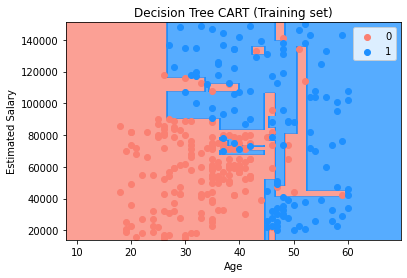

In [9]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, 
             classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             cmap = ListedColormap(('salmon', 'dodgerblue')),
             alpha = 0.75)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                color = ListedColormap(('salmon', 'dodgerblue'))(i), 
                label = j)
plt.title('Decision Tree CART (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

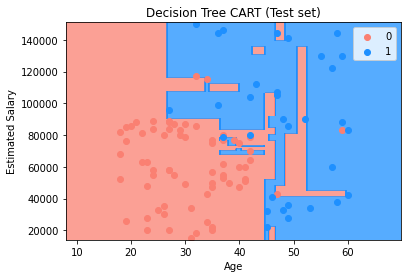

In [10]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, 
             classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             cmap = ListedColormap(('salmon', 'dodgerblue')),
             alpha = 0.75)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                color = ListedColormap(('salmon', 'dodgerblue'))(i), 
                label = j)
plt.title('Decision Tree CART (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()